In [190]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [191]:
dach_length = [75,77,83,81,73,99,72,83]
dach_height = [24,29,19,32,21,22,19,34]

samo_length = [76,78,82,88,76,83,81,89]
samo_height = [55,58,53,54,61,52,57,64]

mal_length = [35,39,38,41,30,57,41,35]
mal_height = [23,26,19,30,21,24,28,20]


In [192]:
d_data = np.column_stack((dach_length, dach_height))
d_label = np.zeros(len(d_data),int)

s_data = np.column_stack((samo_length,samo_height))
s_label = np.ones(len(s_data),int)

m_data = np.column_stack((mal_length,mal_height))
arr = []
for _ in range(len(mal_length)):
    arr.append(2)
m_label = np.array(arr)

m_label

array([2, 2, 2, 2, 2, 2, 2, 2])

## 5.1 2차원 배열 출력

In [193]:
print('닥스훈트(0) : ',end='')
print(d_data.tolist())
print('사모예드(1) : ',end='')
print(s_data.tolist())
print('말티즈(2) : ',end='')
print(m_data.tolist())

닥스훈트(0) : [[75, 24], [77, 29], [83, 19], [81, 32], [73, 21], [99, 22], [72, 19], [83, 34]]
사모예드(1) : [[76, 55], [78, 58], [82, 53], [88, 54], [76, 61], [83, 52], [81, 57], [89, 64]]
말티즈(2) : [[35, 23], [39, 26], [38, 19], [41, 30], [30, 21], [57, 24], [41, 28], [35, 20]]


In [194]:
dogs = np.concatenate((d_data, s_data, m_data))
labels = np.concatenate((d_label,s_label,m_label))

dog_classes = {0:'Dachshund', 1:'Samoyed', 2:'Maltese'}
dogKName = {0:'닥스훈트', 1:'사모예드', 2:'말티즈'}

k = 3
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(dogs,labels)
pred = np.array([[0,0,0] for _ in range(3)])
for i in range(len(labels)):
    p = knn.predict([dogs[i]])
    if p == 0:
        pred[labels[i]][0] += 1
    elif p == 1:
        pred[labels[i]][1] += 1
    elif p == 2:
        pred[labels[i]][2] += 1


## 5.2 k = 3일때 결과 혼동행렬

In [195]:
pred

array([[8, 0, 0],
       [0, 8, 0],
       [1, 0, 7]])

## 5.3 데이터 A,B,C,D에 대해 각각 n_neighbors를 3,5,7로 하여 결과 출력

In [196]:
newDataList = [[58,30],[80,26],[80,41],[75,55]]
kList = [3,5,7]
abcLabel = ['A','B','C','D']
for i in range(4):
    print(abcLabel[i]," 데이터 분류 결과")
    for k in kList:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(dogs,labels)
        pred = knn.predict([newDataList[i]])

        print(abcLabel[i], [newDataList[i]], ' : n_neighbors가 ',k ,'일때 : ', dogKName[pred[0]])

A  데이터 분류 결과
A [[58, 30]]  : n_neighbors가  3 일때 :  말티즈
A [[58, 30]]  : n_neighbors가  5 일때 :  말티즈
A [[58, 30]]  : n_neighbors가  7 일때 :  닥스훈트
B  데이터 분류 결과
B [[80, 26]]  : n_neighbors가  3 일때 :  닥스훈트
B [[80, 26]]  : n_neighbors가  5 일때 :  닥스훈트
B [[80, 26]]  : n_neighbors가  7 일때 :  닥스훈트
C  데이터 분류 결과
C [[80, 41]]  : n_neighbors가  3 일때 :  닥스훈트
C [[80, 41]]  : n_neighbors가  5 일때 :  닥스훈트
C [[80, 41]]  : n_neighbors가  7 일때 :  사모예드
D  데이터 분류 결과
D [[75, 55]]  : n_neighbors가  3 일때 :  사모예드
D [[75, 55]]  : n_neighbors가  5 일때 :  사모예드
D [[75, 55]]  : n_neighbors가  7 일때 :  사모예드


## 5.4 5.3의 결과로 보아 k값에 영향을 받지 않는 데이터와 그 이유
위의 데이터 중에 B와 D가 k값에 영향을 받지 않는다. 그 이유는 다른 데이터에 비해서 학습 데이터들의 각각의 구분(닥스훈트, 사모예드, 말티즈) 평균 값에 근접해 있기 때문이다. 이는 이웃하는 데이터가 다 같은 종류일 가능성이 높다는 것을 의미한다.

## 5.5 5.3데이터를 산포도 그래프로 그려서 A,B,C,D데이터를 나타내자
(가로축은 길이, 세로축은 높이)

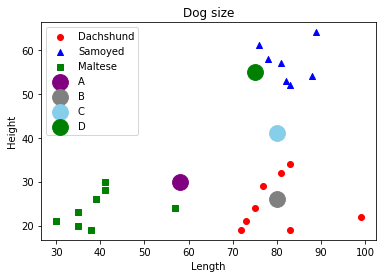

In [197]:
plt.scatter(dach_length,dach_height,c='red',label=dog_classes[0])
plt.scatter(samo_length,samo_height,c='blue',marker='^', label=dog_classes[1])
plt.scatter(mal_length,mal_height,c='green',marker='s', label=dog_classes[2])

color = ['purple','gray','skyblue','green']
for i in range(len(abcLabel)): plt.scatter(newDataList[i][0],newDataList[i][1],c=color[i],s=250,label=abcLabel[i])

plt.xlabel('Length')
plt.ylabel('Height')
plt.title('Dog size')
plt.legend(loc='upper left')

## 5.6 이때까지의 모든 데이터를 포함한 dog_data를 만들고, k-평균 알고리즘을 적용하여 클러스터링을 수행하고, k가 2,3,4일 때의 수행 결과를 시각화하라.

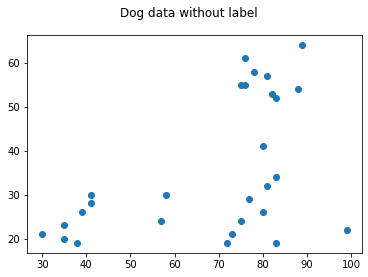

In [198]:
from sklearn.cluster import KMeans

def KmeansPredictPlot(data,k):
    model = KMeans(n_clusters=k)
    model.fit(data)
    labels = model.predict(data)
    colors = np.array(['red','green','blue','purple'])
    plt.suptitle('k-Means clustering. k=%d'%(k))
    plt.scatter(data[:,0],data[:,1], color=colors[labels])


dog_data = np.concatenate((dogs,newDataList))

plt.suptitle('Dog data without label')
plt.scatter(dog_data[:,0],dog_data[:,1])

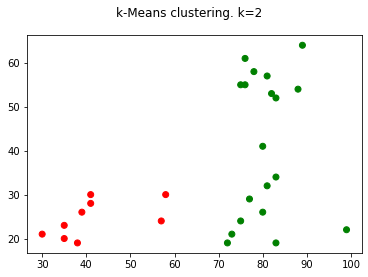

In [201]:
KmeansPredictPlot(dog_data,2)

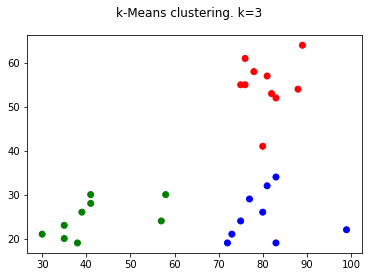

In [202]:
KmeansPredictPlot(dog_data,3)

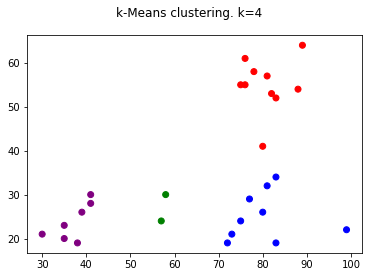

In [203]:
KmeansPredictPlot(dog_data,4)